# ARKit動作中のリアルタイム点群センシング

In [5]:
import arkit.arkit_sensor_ar_ex as ar
import copy
from coreimage.core_image import *
from uikit.ui_uiimage_convert import *

# MyARViewクラスをインスタンス化して初期化する
arview = ar.MyARView()
arview.initScene()

# ディスプレイ画面の大きさを調べて
scr = ar.get_screen_size()
# ディスプレイ画面の全面にAR表示を行う
arview.initialize([0,0,scr.width,scr.height/2],
                  False) # AR空間に座標軸や特徴点を表示するか

import numpy as np
import time

# 色画像・距離画像を入れるリストを用意
video_and_depths = []

# AR処理中に呼び出されて、色画像・距離画像をリストに追加する関数
def process(video_and_depth):    
    video_and_depths.append(
        {
            "video": ui2np(ci2ui(pixelBuffer2ci(
video_and_depth["video"]))),
            "depth":copy.copy(video_and_depth["depth"])
        }
    )

isNeedToBeCaptured = False # 色画像・距離画像取得を開始するか
for i in range(5):
    if isNeedToBeCaptured != False:
        continue
    # AR処理が外界を認識していたら、色画像・距離画像を取得する
    if arview.arsession.currentFrame() is None:
        pass
    else: # MyARView の「色画像・距離画像」取得メソッドを呼ぶ
        is_captured = arview.capture_video_and_depth(
            process, # ユーザー処理関数
            False)   # 複数フ`レームで「滑らか」にした距離マップ画像を使うか
        if is_captured:
            isNeedToBeCaptured = True
            print("Captured.")
    time.sleep(0.5)
            
arview.close_view()

ARFrameSemanticSmoothedSceneDepth is enabled.
ARFrameSemanticSceneDepth is enabled.
Captured.


In [6]:
print( video_and_depths )

[{'video': array([[[251, 236, 209, 255],
        [252, 237, 210, 255],
        [251, 236, 209, 255],
        ...,
        [175, 178, 137, 255],
        [172, 175, 135, 255],
        [173, 176, 137, 255]],

       [[251, 236, 209, 255],
        [252, 237, 210, 255],
        [252, 237, 210, 255],
        ...,
        [173, 176, 136, 255],
        [171, 173, 133, 255],
        [171, 173, 134, 255]],

       [[251, 236, 209, 255],
        [252, 237, 210, 255],
        [250, 235, 208, 255],
        ...,
        [174, 177, 137, 255],
        [171, 173, 134, 255],
        [165, 167, 128, 255]],

       ...,

       [[ 20,  26,  22, 255],
        [ 18,  25,  21, 255],
        [ 17,  23,  19, 255],
        ...,
        [205, 185, 152, 255],
        [205, 185, 152, 255],
        [206, 186, 153, 255]],

       [[ 16,  22,  19, 255],
        [ 14,  20,  18, 255],
        [ 11,  18,  15, 255],
        ...,
        [208, 188, 155, 255],
        [206, 186, 153, 255],
        [205, 185, 152, 255]],

 

In [7]:
video_h, video_w, ch = video_and_depths[0]['video'].shape  # 取得した画像の縦・横サイズ
print("image: height:{:d} pixels x width:{:d} pixels".format(video_h, video_w))

depth_h, depth_w = video_and_depths[0]['depth'].shape  # 取得した画像の縦・横サイズ
print("depth: height:{:d} pixels x width:{:d} pixels".format(depth_h, depth_w))

image: height:1440 pixels x width:1920 pixels
depth: height:192 pixels x width:256 pixels


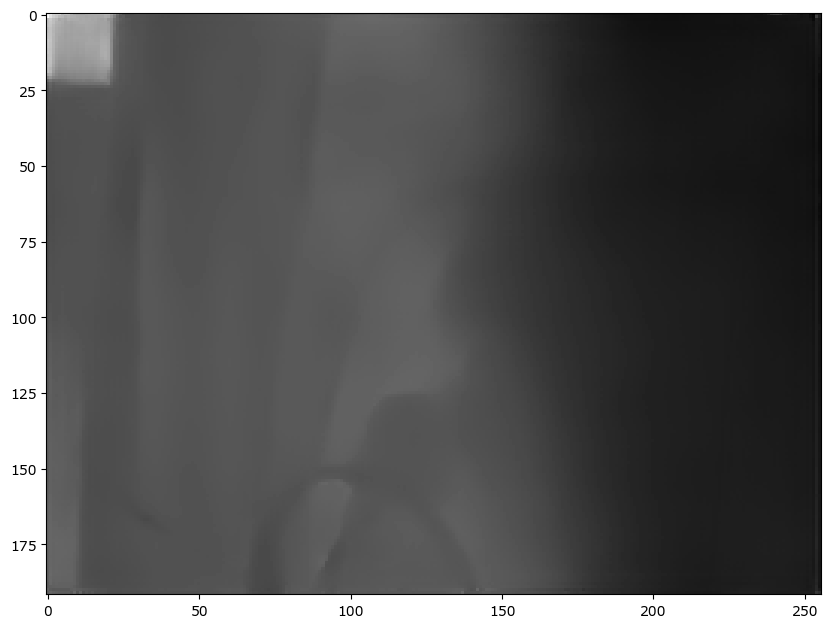

In [8]:
# matplotlibを使って画像を表示する
from matplotlib import pylab as plt
import cv2

# 画像を表示する
plt.figure(figsize=[10,10])

plt.imshow(video_and_depths[0]['depth'], cmap='gray')

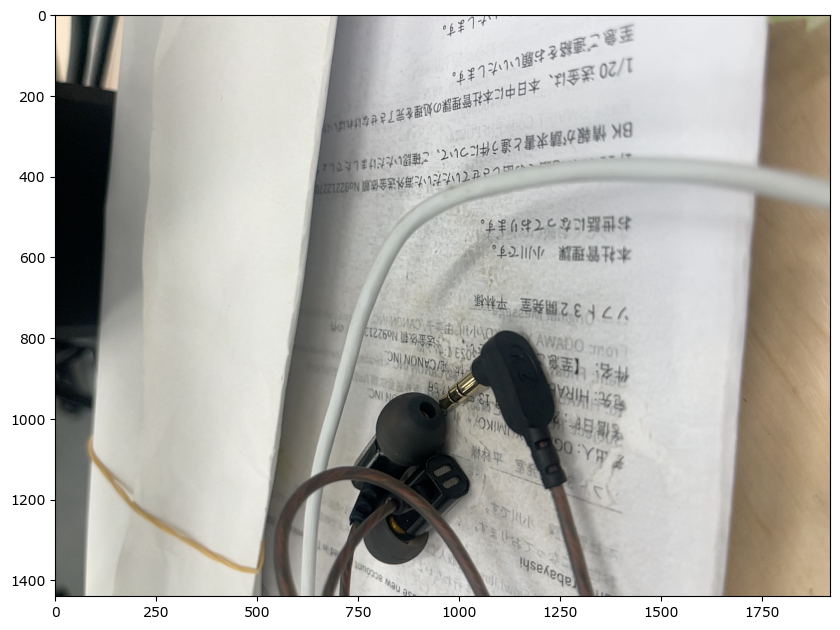

In [9]:
# matplotlibを使って画像を表示する
from matplotlib import pylab as plt
import cv2

plt.figure(figsize=[10,10])
rgba_image =  video_and_depths[0]['video']
plt.imshow(rgba_image)